<center><h1> Perception Task 1 (a) </h1></center> 

## Import Packages

In [1]:
import numpy as np # To be able to handle arrays
import cv2 as cv # To convert image color space
import matplotlib.pyplot as plt # To plot images
import pandas as pd # To use dataframes
import os # To access directory files
from sklearn.model_selection import train_test_split # To split the data, to be able to check the val accuracy
from keras.models import Sequential # To use nerual networks
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization # To use CNN and ANN

In [2]:
# To make the plot visible in jupyter
%matplotlib inline

## Preprocessing

In [3]:
# Enter data path
PATH = "A:\Professional\Student Activities\Formula\Perception Interview Task\Dogs_vs_Cats_Classification\data" 

- Our data Directory:
    - train (1,363 items)
        - dog.21.jpg, cat.08.jpg,....
    - test (36 items)
        - dog.11.jpg, cat.01.jpg,....

In [4]:
# As our data is classifed by dog/cat name plus a number,
# then we can make use of this assigning each dog/cat category into a dataframe along with the name ofeach image
train_path = os.listdir(f"{PATH}\\train")
categories = []
for data in train_path:
    category = data.split('.')[0]
    if category == 'dog':
        categories.append(1) # We have to assign integers to each category because we will handle the images as matrices
    else:
        categories.append(0)
        

train_df = pd.DataFrame({
    'path': train_path,
    'category': categories
})

In [5]:
# The test dataframe at which we will test our model with
test_path = os.listdir(f"{PATH}\\test")
categories = []
for data in test_path:
    category = data.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)
        

test_df = pd.DataFrame({
    'path': test_path,
    'category': categories
})

In [6]:
# To check validation accuracy vs model accuracy 
train_data, val_data = train_test_split(train_df, test_size=0.20, random_state=42)

In [7]:
train_data

,path,category
1005,dog.22.jpg,1
1292,dog.480.jpg,1
845,dog.1149.jpg,1
949,dog.168.jpg,1
54,cat.1046.jpg,0
...,...,...
1095,dog.301.jpg,1
1130,dog.333.jpg,1
1294,dog.482.jpg,1
860,dog.1162.jpg,1


### Convert Images into Arrays 

In [8]:
# Convert our train rgb images into grayscale, to make computations easier, and to make it more cleat to detect edges
train_list = []
y_train_list = []
arr = []
for img in train_data['path']:
    arr = cv.imread(F"{PATH}\\train\\{img}")
    gray_arr = cv.cvtColor(arr, cv.COLOR_BGR2GRAY)
    new_arr = cv.resize(gray_arr, (120, 120)) # Resize images into 120*120
    train_list.append(new_arr)
    train_array = np.array(train_list) # Our train images as arrays
    
y_train_array = np.array(train_data['category']) # Our categories as array

1


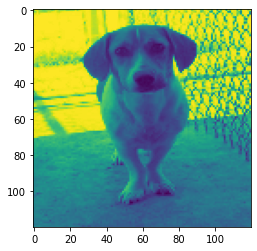

In [9]:
# A trial to detect if all our data is clean
plt.imshow(train_array[1000])
print(y_train_array[1000])

In [10]:
# Convert our val rgb images into grayscale, to make computations easier, and to make it more cleat to detect edges
val_list = []
arr = []
for img in val_data['path']:
    i = 0
    arr = cv.imread(F"{PATH}\\train\\{img}")
    gray_arr = cv.cvtColor(arr, cv.COLOR_BGR2GRAY)
    new_arr = cv.resize(gray_arr, (120, 120))
    val_list.append(new_arr)
    val_array = np.array(val_list) # Our val images as arrays
    
y_val_array = np.array(val_data['category']) 

In [11]:
# Convert our test rgb images into grayscale, to make computations easier, and to make it more cleat to detect edges
test_list = []
arr = []
for img in test_df['path']:
    arr = cv.imread(F"{PATH}\\test\\{img}")
    gray_arr = cv.cvtColor(arr, cv.COLOR_BGR2GRAY)
    new_arr = cv.resize(gray_arr, (120, 120))
    test_list.append(new_arr)
    test_array = np.array(test_list)
    
y_test_array = np.array(test_df['category'])

### Arrays Processing

In [12]:
# Standardization to make combutations more easier 
train_array = train_array/255.0
val_array = val_array/255.0
test_array = test_array/255.0

In [13]:
# Reshaping our arrays before entering it into our neural netowrk to prevent any errors
train_array = train_array.reshape(-1, 120, 120, 1)
val_array = val_array.reshape(-1, 120, 120, 1)
test_array = test_array.reshape(-1, 120, 120, 1)

y_train_array = y_train_array.reshape(-1,1)
y_test_array = y_test_array.reshape(-1,1)
y_val_array = y_val_array.reshape(-1,1)

## Deep Learning Model

In [14]:
# Constants
Image_width = 120
Image_height = 120
Image_channels = 1
batch_size = 15
epochs = 12
total_train = train_array.shape[0]
total_val = val_array.shape[0]

In [15]:
# Create Neural Network
model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_width,Image_height,Image_channels))) # CNN
model.add(BatchNormalization()) # To prevent overfitting
model.add(MaxPooling2D(pool_size=(2,2))) # To get the most effective data
model.add(Dropout(0.25)) # To prevent overfitting

model.add(Conv2D(64,(3,3),activation='relu')) # The relu to discard negative pixels
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2))) 
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu')) # Filters with size 3*3
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2,activation='softmax'))   # 2 because we have cat and dog classes

In [16]:
# Compile our model
model.compile(loss='sparse_categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      320       
                                                                 
 batch_normalization (BatchN  (None, 118, 118, 32)     128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 59, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 batch_normalization_1 (Batc  (None, 57, 57, 64)       2

In [17]:
# Create efficient callbacks
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience=10) # Earlystopping prevents the overfitting
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', # Learning rate reduction reduce the learning rate
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
callbacks = [earlystop, learning_rate_reduction]

In [18]:
# Train our model
history = model.fit(train_array, y_train_array,
          batch_size=batch_size,
          epochs=epochs,
          validation_data=(val_array, y_val_array),
          validation_steps=total_val//batch_size,
          steps_per_epoch=total_train//batch_size,
          callbacks=callbacks)

Epoch 1/12
72/72 [==============================] - 18s 230ms/step - loss: 1.3813 - accuracy: 0.5611 - val_loss: 1.0844 - val_accuracy: 0.4741 - lr: 0.0010
Epoch 2/12
72/72 [==============================] - 16s 219ms/step - loss: 1.0303 - accuracy: 0.6112 - val_loss: 0.7080 - val_accuracy: 0.5000 - lr: 0.0010
Epoch 3/12
72/72 [==============================] - 22s 313ms/step - loss: 0.7765 - accuracy: 0.6447 - val_loss: 0.7582 - val_accuracy: 0.5370 - lr: 0.0010
Epoch 4/12
72/72 [==============================] - 20s 279ms/step - loss: 0.6683 - accuracy: 0.6940 - val_loss: 0.7780 - val_accuracy: 0.5630 - lr: 0.0010
Epoch 5/12
72/72 [==============================] - 18s 244ms/step - loss: 0.5615 - accuracy: 0.7451 - val_loss: 0.8786 - val_accuracy: 0.6000 - lr: 0.0010
Epoch 6/12
72/72 [==============================] - 30s 410ms/step - loss: 0.4627 - accuracy: 0.7898 - val_loss: 1.2795 - val_accuracy: 0.5741 - lr: 0.0010
Epoch 7/12
72/72 [==============================] - 29s 400ms/st

In [19]:
# Save our model
model.save_weights("./arr_model.h5")

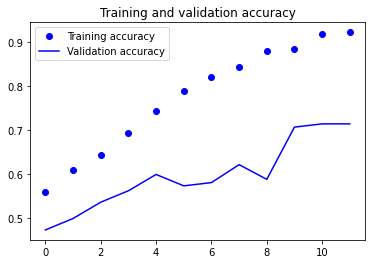

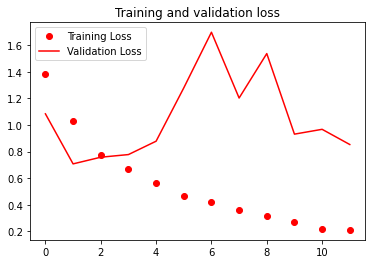

In [20]:
# Plot our training accuracy/loss vs val accuracy/loss
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epoches = range(len(acc))

plt.plot(epoches, acc, 'bo', label='Training accuracy')
plt.plot(epoches, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epoches, loss, 'ro', label='Training Loss')
plt.plot(epoches, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- We notice that this array-based model despite of all what we did to reduce overfitting, it still overfits! 
- So, it is advisable to work with image-based model as in the other notebook
- We reached training accuracy of `85%` and validation accracy of `71%`

## Make Predictions

In [21]:
# Check predictions
prediction = model.predict(test_array)
# Because prediction has two propability values with each test image. 
# So, we return indices of the max element of the array in each row
preds_classes = np.argmax(prediction, axis=-1) 

2/2 [==============================] - 1s 55ms/step


Real value:
dog

Predicted value:
dog


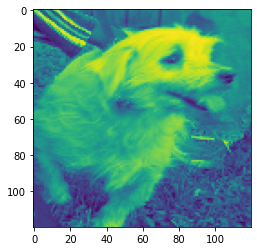

In [23]:
# Test
test_img = test_df.sample()
plt.imshow(test_array[test_img.index.values[0]])
print(f"Real value:\n{test_img['path'].values[0].split('.')[0]}\n")

predicted_value = ''
if preds_classes[test_img.index.values[0]] == 1:
    predicted_value = 'dog'
else:
    predicted_value = 'cat'

print(f"Predicted value:\n{predicted_value}")